In [173]:
import numpy as np
import matplotlib.pyplot as plt

h=40 #In cm

In [174]:
def MetropolisHastings(pdf, N, x_init, sigma):
    chain_points=np.zeros((N,x_init.shape[0]))
    stepsize=sigma
    accepted=0
    x_old=x_init
    for i in range(N):
      x_new =np.random.uniform(low=x_old-(1/2)*stepsize,high=x_old+(1/2)*stepsize,size=x_old.shape)
      p_accept=min(1, pdf(x_new)/pdf(x_old))
      accept = (np.random.random()<p_accept)
      if accept:
        x_old=x_new
      chain_points[i,:]=x_old
      accepted += accept

    acceptance_rate = accepted / float(N)
    print("For proposal width=",sigma,"acceptance rate=",acceptance_rate)
    return chain_points

def pdf_theta1(x,theta_max=90):
    if (x>(np.pi*theta_max/180)) or (x<0):
        return 0
    return np.cos(x)**2


For proposal width= 0.1 acceptance rate= [0.969221]


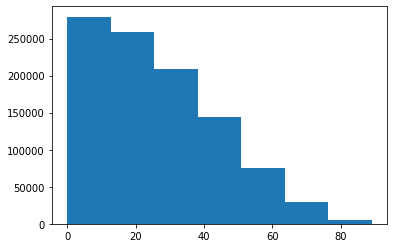

In [175]:
#Random theta generator that follows the theta disrtibution of cosmic muons:

x_init=np.array([1])
y=MetropolisHastings(pdf_theta1, 1000000, x_init, 0.1)
w=plt.hist(y*(180/np.pi),bins=7)

Text(0, 0.5, 'Number of events')

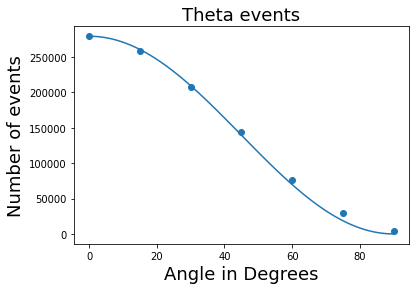

In [176]:
#Test of random theta generator with the theoretical values:

d=np.linspace(0,np.pi/2,7)
plt.scatter(d*(180/np.pi),w[0])

x=np.linspace(0,np.pi/2,100)
plt.plot(x*(180/np.pi),w[0][0]*np.cos(x)**2)
plt.title("Theta events" , fontsize=18)
plt.xlabel('Angle in Degrees', fontsize=18)
plt.ylabel('Number of events', fontsize=18)

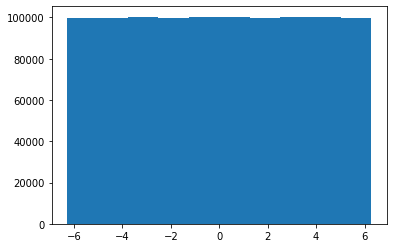

In [177]:
#Random phi generator that follows the phi disrtibution(uniform) of cosmic muons:

q=np.random.uniform(-2*np.pi,2*np.pi,1000000)
qqqq=plt.hist(q)

In [178]:


theta_min=np.arctan(np.sqrt((10)**2+(10)**2)/h)*(180/np.pi)
A1=15*15             #surface of up layer of scintillators.
A2=5*5               #surface of low scintillator.
N2=(170*A1/(10**4))*(300/500)   #number of events per minimum time period that we can detect an event for layer.
N1=(170*A2/(10**4))*(300/500)  #number of events per minimum time period that we can detect an event fow low scint.
                                #The (300/500) is the experimental value of maximum of 500 events for 5 min. 
                                #The constant 170 is the expected muons per second*(m**2).

#With the below we find the ratio of events for higher than theta_max of coincidence detectable events.        
n=0
for i in y:
    if i>(theta_min*np.pi/180):
        n+=1
N_L=(n/1000000)


0.255 2.295 9.0 23.647059750865086 380597


()
1009341


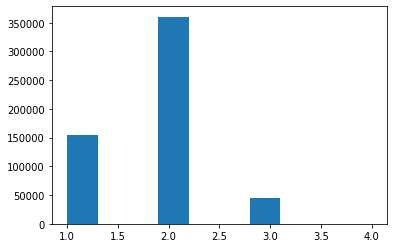

In [186]:
#Number of events per minimum measurable time period for upper layer:

t1=np.random.normal(N2, 0.5, 560000).astype(int)
print(t1[0].shape)
for i in range(560000):
    if t1[i]==0:
        t1[i]=1
ttttt=plt.hist(t1)
print(t1.sum())
np.random.shuffle(t1)

1137213


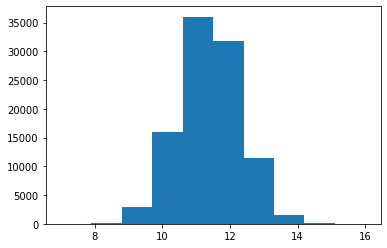

In [181]:
#Number of events of upper layer events for one event of the low scintillator to occure with theta higher than
#the coincidence measurable range: 

t2=np.random.normal(N2/N1/N_L, 1, 100000).astype(int)
ttttt=plt.hist(t2)
print(t2.sum())
np.random.shuffle(t2)

In [182]:
#Shuffling of the angular values for the random events
np.random.shuffle(y)
np.random.shuffle(y2)
np.random.shuffle(q)

#random points on the upper layer surface:
rx=np.random.uniform(-7.5,7.5,1000000)
ry=np.random.uniform(-7.5,7.5,1000000)

In [243]:
#Example of h=40 cm:

z=-h
lost=0
false=0
measured=0
k1=0
k2=0
n2=0
n1=0
m=0
z2=-1
not_measurable=0
det1=np.zeros(3)
det2=np.zeros(3)
theta_m=0
while n2+t1[k1]<1000000:
    for i in range(t1[k1]):
        r=z/np.cos(y[i+n2])
        x1=r*np.sin(y[i+n2])*np.cos(q[i+n2]) +rx[i+n2]
        y1=r*np.sin(y[i+n2])*np.sin(q[i+n2]) +ry[i+n2]
        
        r2=z2/np.cos(y[i+n2])
        x2=r*np.sin(y[i+n2])*np.cos(q[i+n2])
        y2=r*np.sin(y[i+n2])*np.sin(q[i+n2])
        
        #First Layer:
        
        if ((rx[i+n2]<2.5 and rx[i+n2]>-2.5) and det1[1]==0):
            det2[1]=1
        elif rx[i+n2]<2.5 and rx[i+n2]>-2.5 and det1[1]==1:
            lost+=1
            m3=1
        elif rx[i+n2]<7.5 and rx[i+n2]>2.5 and det1[2]==0:
            det2[2]=1
        elif rx[i+n2]<7.5 and rx[i+n2]>2.5 and det1[2]==1:
            lost+=1
            m3=1
        elif det2[0]==0:
            det2[0]=1
        elif det2[0]==1:
            lost+=1
            m3=1
        
        #Second Layer:
        
        if y2<2.5 and y2>-2.5 and det2[1]==0:
            det2[1]=1
        elif y2<2.5 and y2>-2.5 and det2[1]==1 and m3==0:
            lost+=1
        elif y2<7.5 and y2>2.5 and det2[2]==0:
            det2[2]=1
        elif y2<7.5 and y2>2.5 and det2[2]==1 and m3==0:
            lost+=1
        elif det2[0]==0:
            det2[0]=1
        elif det2[0]==1 and m3==0:
            lost+=1
        
        #Low Scintillator:
        
        if (x1<2.5 and x1>-2.5) and (y1<2.5 and y1>-2.5):
            if m==0:
                m=1
                measured+=1
                if theta_m<y[i+n2]:
                    theta_m=y[i+n2]
            elif m3==0:
                lost+=1
                not_measurable+=1
        
        m3=0
        
    det1[0]=0
    det1[1]=0
    det1[2]=0
    det2[0]=0
    det2[1]=0
    det2[2]=0
    n2+=t1[k1]
    n1+=t1[k1]
    if (m==0) and (t2[k2]<=n1):
        false+=1
        k2+=1
        n1=0
    elif (m==1) and (t2[k2]<=n1):
        k2+=1
        n1=0

    k1+=1
    m=0            


In [292]:
print("Lost:",lost/10000,"%")
print("False:",false/10000,"%")
print("Measured coincidence:",measured/10000,"%")
print("Not measured coincidence:",not_measurable/10000,"%")
print("Maximum theta",round(theta_m[0]*(180/np.pi)))

Lost: 56.3981 %
False: 7.9573 %
Measured coincidence: 2.8057 %
Not measured coincidence: 0.0356 %
Maximum theta 18
